## F1-Score

- F1-score is a metric which takes into account both ,precision and recall as we can’t always evaluate both and then take the higher one for our model. It is the harmonic mean of precision and recall. It tells us about the balance that exists between precision and recall.

- F1-score: This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

<img src="6.png">

We use the Harmonic Mean since it penalizes the extreme values.

<br><br>

### When It used:
- F1-score is used when the False Negatives and False Positives are crucial.
- F1-score is a better metric when there are imbalanced classes.
- In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

### Some advantages of F1-score:

- Very small precision or recall will result in lower overall score. Thus it helps balance the two metrics.
- If you choose your positive class as the one with fewer samples, F1-score can help balance the metric across positive/negative samples.
- As illustrated by the first figure in this article, it combines many of the other metrics into a single one, capturing many aspects at once.

## F-β score:
- The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.

<img src="7.png">

- Here Three Condition ariese
    
     1. β=1 (F1 score) - When FP And FN are equally important.
     2. β=0.5 (F0.5 score) - when importance of FP is greater than FN.
     3. β=2 (F2 score) - When FN imapct is high we increase β value 1 to 2.

## ROC And AUC Curve

- Befor Going to ROC and AUC i discuss about main 4 term
    1. TPR (Recall)
    2. TNR (Specificity)
    3. FPR (1-specificity)
    4. FNR
<img src="8.png">

1. TPR (True Positive Rate): In machine learning, the true positive rate, also referred to sensitivity or recall, is used to measure the percentage of actual positives which are correctly identified.

2. TNR (True Negative Rate) : The Specificity of a test, also referred to as the true negative rate (TNR), is the proportion of samples that test negative using the test in question that are genuinely negative.

3. FPR (False Positive Rate) : In statistics, when performing multiple comparisons, a false positive ratio (also known as fall-out or false alarm ratio) is the probability of falsely rejecting the null hypothesis for a particular test. The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification).

4. FNR (False Negative Rate) : The rate of occurrence of negative test results in those who have the attribute or disease for which they are being tested.

#### Now i am going to discuss about ROC And AUC

### What is ROC curve?

- ROC curve is one the important evaluating metrics that should be used to check the performance of an classification model.It is also called relative operating characteristic curve, because it is a comparison of two main characteristics (TPR and FPR).

- It is plotted between sensitivity(recall) and False Positive Rate (FPR = 1-specificity).

### What is AUC?

- AUC also called as AREA UNDER CURVE.It is used in classification analysis in order to determine which of the used models predicts the classes best. An example of its application are ROC curves.
- AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0 and if the predictions are 100% correct has an AUC of 1.

<img src="12.png" width=350>

## implementation Of ROC And AUC

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/Suji04/Diabetes-Detection/master/diabetes.csv"
data = pd.read_csv(url)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

### Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

## Feature Scling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Classifier Model

#### A. Logistic Regrssion

In [6]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(C=2)
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)


#### B. DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)
dt.fit(X_train,y_train)

y_pred_dt = dt.predict_proba(X_test)

#### B. RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict_proba(X_test)

### Find Roc And Auc Score Of These three model

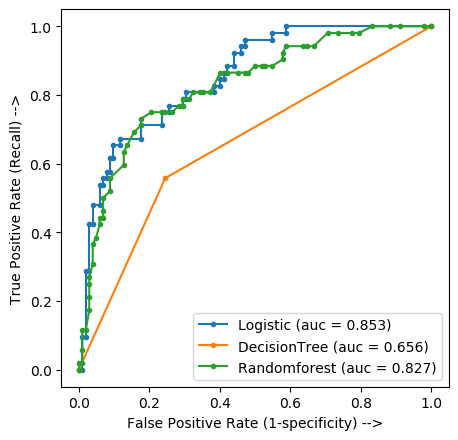

In [9]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt[:,1:2])
auc_dt = auc(dt_fpr, dt_tpr)

rfr_fpr, rfr_tpr, threshold = roc_curve(y_test, y_pred_rfr[:,1:2])
auc_rfr = auc(rfr_fpr, rfr_tpr)

# svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
# auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree (auc = %0.3f)' % auc_dt)
plt.plot(rfr_fpr, rfr_tpr, marker='.', label='Randomforest (auc = %0.3f)' % auc_rfr)

plt.xlabel('False Positive Rate (1-specificity) -->')
plt.ylabel('True Positive Rate (Recall) -->')

plt.legend()

plt.show()

- Here you see that 3 model has different Auc score. so here we consider which has higher auc score